# Supervised Learning

TL;DR
Given data $X$, find a function $f$ which maps $X$ on to $y$:

$$f: X -> y$$


Supervised learning is a type of machine learning where the goal is to learn a mapping from input data $X$ to an output $y$. Given a dataset of input-output pairs, the objective is to find a function $f$ that best maps each input $X$ to its corresponding output $y$. This function $f$ can then be used to predict the output for new, unseen inputs.

- Key Concepts:
    - Training Data: A set of input-output pair ($X$, $y$) used to train the model. The input $X$ can be a single feature or a set of features, and $y$ is the corresponding target value.
    - Function $f$: The model or algorithm that maps inputs to outputs $y$. This function is learned from the training data.
    - Prediction: Once the function $f$ is learned, it can be used to predict the output $\hat{y}$ for new input data.

- Types of Supervised Learning:
    - Regression: When the target variable $y$ is continuous. For example, predicting house prices based on features like size and location.
    - Classification: When the target variable $y$ is categorical. For example, classifying emails as spam or not spam.

- Example:
    - Regression: Given a dataset of house prices with features such as size, number of bedrooms, and location, supervised learning can be used to predict the price of a house based on these features. The function $f$ would map the features (input $X$) to the price (output $y$).

    - Classification: Given a dataset of emails labeled as "spam" or "not spam," supervised learning can be used to classify new emails. The function $f$ would map the email features (input $X$) to the categories "spam" or "not spam" (output $y$).

- Process of Supervised Learning:
    - Data Collection: Gather a dataset with input-output pairs.
    - Data Preprocessing: Clean and prepare the data for training.
    - Model Selection: Choose an appropriate algorithm to learn the mapping function $f$.
    - Training: Use the training data to learn the function $f$.
    - Evaluation: Assess the model's performance using a separate set of data (validation or test data).
    - Prediction: Use the trained model to make predictions on new data.

Supervised learning is widely used in various applications, such as image recognition, natural language processing, and predictive analytics, due to its effectiveness in learning from labeled data and making accurate predictions.

## Linear Regression

In [ ]:
import os

os.getcwd()

In [ ]:
import io
import requests

import pandas as pd
from sklearn.linear_model import LinearRegression


# url="https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/skincancer/index.txt"
# r = requests.get(url, allow_redirects=True)
# with open('index.txt', 'wb') as f:
#     f.write(r.content)
    
df = pd.read_csv('index.txt', delim_whitespace=True)

In [ ]:
df.head(5)

In [ ]:
model = LinearRegression()

In [ ]:
LinearRegression?

In [ ]:
X = df[['Lat']]
y = df['Mort']

model.fit(X, y)

In [ ]:
mort_pred = model.predict(X)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df['Lat'], df['Mort'], label='observation')
ax.scatter(df['Lat'], mort_pred, label='fit')

ax.set_xlabel('Lat')
ax.set_ylabel('Mort')

ax.legend()

### Metrics:

#### Mean Squared Error (MSE)

MSE measures the average squared difference between the observed actual outcomes (true values) and the predictions made by the model. It gives an idea of how well the model's predictions approximate the actual data points. A lower MSE indicates a better fit.

- Formula:
$$\text{MSE} = \frac{1}{n}\sum^{n}_{i=1}(y_i-\hat{y}_i)^2$$

where:
<ul style="padding-left: 40px;">
    <li>$n$ is the number of observations</li>
    <li>$y_i$ is the actual value</li>
    <li>$\hat{y}_i$ the predicted value</li>
</ul>


- Interpretation:
    - Low MSE: Indicates that the model's predictions are close to the actual values.
    - High MSE: Indicates that there is a significant difference between the predicted and actual values, suggesting a poor fit.
    
MSE provides an absolute measure of the average squared difference between actual and predicted values. It is useful for understanding the model's prediction accuracy in terms of error magnitude.

#### $R^2$ Score

The $R^2$ score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It indicates how well the independent variables explain the variability of the dependent variable.

- Formula:
$$R^2 = 1 - \frac{\sum^{n}_{i=1}(y_i-\hat{y}_i)^2}{\sum^{n}_{i=1}(y_i-\bar{y}_i)^2}$$

where:
<ul style="padding-left: 40px;">
    <li>$y_i$ is the actual value</li>
    <li>$\hat{y}_i$ is the predicted value</li>
    <li>$\bar{y}_i$ is the mean of the actual values</li>
    <li>$\sum^{n}_{i=1}(y_i-\hat{y}_i)^2$ is the sum of squares of residuals</li>
    <li>$\sum^{n}_{i=1}(y_i-\bar{y}_i)^2$ is the total sum of squares</li>
</ul>


- Interpretation:
    - $R^2=1$: The model perfectly predicts the dependent variable.
    - $R^2=0$: The model does not explain any variability in the dependent variable.
    - $R^2<0$: The model performs worse than a horizontal line (mean of actual values), indicating poor predictive ability.
    
$R^2$ Score provides a relative measure of how well the model explains the variance in the dependent variable compared to the mean model (predicting the mean of actual values). It helps understand the goodness-of-fit of the model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(mort_pred, df['Mort'])

## Logistic Regression

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://files.realpython.com/media/log-reg-1.e32deaa7cbac.png")

In [ ]:
url="https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
r = requests.get(url, allow_redirects=True)
with open('heights_weights_genders.csv', 'wb') as f:
    f.write(r.content)

df = pd.read_csv('heights_weights_genders.csv', sep=',')

X = df[['Height', 'Weight']]
y = df['Gender']

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

### Metrics:

#### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It summarizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

||   0   |   1   |
|---|---|---|
|  0   |   TN  |   FP  |
|  1   |   FN  |   TP  |

- True Positives (TP): The number of instances correctly predicted as positive.
- True Negatives (TN): The number of instances correctly predicted as negative.
- False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).

Provides a detailed breakdown of correct and incorrect classifications.

#### Precision
Precision (also called Positive Predictive Value) is the ratio of correctly predicted positive observations to the total predicted positives. It tells us how many of the predicted positive cases were actually positive.

$$\text{Precision}=\frac{TP}{TP+FP}$$

Measures the accuracy of the positive predictions.

#### Recall
Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class. It tells us how many of the actual positive cases were correctly predicted.

$$\text{Recall}=\frac{TP}{TP+FN}$$

Measures the ability to capture all positive instances.

#### F1-Score
The F1-score is the harmonic mean of Precision and Recall. It provides a balance between Precision and Recall, especially useful when the class distribution is imbalanced.

$$\text{F1-Score}=2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$

Balances precision and recall, useful for imbalanced datasets.

#### Accuracy
Accuracy is the ratio of correctly predicted observations to the total observations. It gives an overall effectiveness of the classifier.

$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$

Overall correctness of the model, but can be misleading for imbalanced datasets.

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix

In [ ]:
import numpy as np

b = model.intercept_[0]
w1, w2 = model.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = 50, 80
ymin, ymax = 50, 300
xd = np.array([xmin, xmax])
yd = m*xd + c

fig, ax = plt.subplots()

male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']

ax.plot(xd, yd, 'k', lw=1, ls='--', label='boundary')
ax.scatter(male['Height'], male['Weight'], c='b', alpha=0.5, label='Male')
ax.scatter(female['Height'], female['Weight'], c='r', alpha=0.5, label='Female')

ax.legend()

## Decision Tree

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the most significant attributes, creating a tree-like model of decisions. Each internal node of the tree represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a class label (for classification) or a continuous value (for regression).

- Key Concepts:
    - Root Node: Represents the entire dataset, which is then split into two or more homogeneous sets.
    - Splitting: The process of dividing a node into two or more sub-nodes.
    - Decision Node: When a sub-node splits into further sub-nodes.
    - Leaf/Terminal Node: Nodes that do not split further.
    - Pruning: The process of removing sub-nodes to prevent overfitting.
    - Entropy and Gini Index: Measures to find the best split.

- Steps in Building a Decision Tree:
    - Select the Best Attribute: Use a measure like entropy or Gini index to find the attribute that best separates the dataset.
    - Split the Dataset: Divide the dataset into subsets based on the best attribute.
    - Repeat the Process: Apply the process recursively for each subset until stopping criteria (e.g., maximum depth, minimum samples per leaf) are met.


Example with the Iris Dataset

- Let's use the DecisionTreeClassifier from Scikit-Learn to create a decision tree based on the famous Iris dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

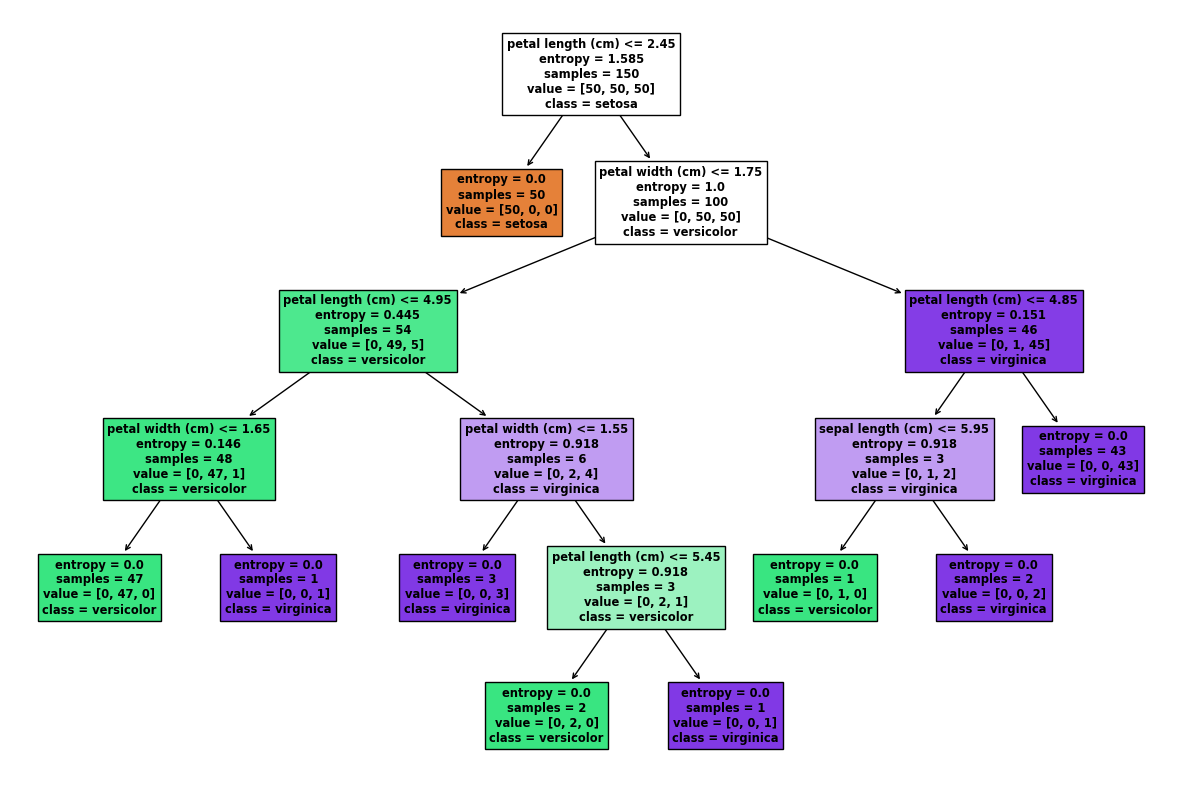

In [2]:
# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()